In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
train_data = pd.read_csv('train_FD001.txt', sep=' ', header=None)
test_data = pd.read_csv('test_FD001.txt', sep=' ', header=None)

In [288]:
# Checking the header of train data

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [289]:
# Checking the header of test data

test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [290]:
# Rename the columns as defined in the problem description.
'''
1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
...
26)	sensor measurement  26

'''

train_data.rename(columns={0: 'Unit Number', 1: 'Cycle'}, inplace=True)
test_data.rename(columns={0: 'Unit Number', 1: 'Cycle'}, inplace=True)

In [291]:
# Renaming for the remaining columns as it is indicated in the description

for i in range(train_data.shape[1]):  # Iterate over column indices
    if 1 < i < 5:
        # Rename columns using column index and name
        train_data.rename(columns={train_data.columns[i]: f'Operational Setting {i-1}'}, inplace=True)
        test_data.rename(columns={test_data.columns[i]: f'Operational Setting {i-1}'}, inplace=True)
    elif i>=5:
        train_data.rename(columns={train_data.columns[i]: f'Sensor Measurement {i-4}'}, inplace=True)
        test_data.rename(columns={test_data.columns[i]: f'Sensor Measurement {i-4}'}, inplace=True)


In [292]:
train_data

,Unit Number,Cycle,Operational Setting 1,Operational Setting 2,Operational Setting 3,Sensor Measurement 1,Sensor Measurement 2,Sensor Measurement 3,Sensor Measurement 4,Sensor Measurement 5,...,Sensor Measurement 14,Sensor Measurement 15,Sensor Measurement 16,Sensor Measurement 17,Sensor Measurement 18,Sensor Measurement 19,Sensor Measurement 20,Sensor Measurement 21,Sensor Measurement 22,Sensor Measurement 23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [293]:
# Creating RUL for the engines by substracting the cycle from the maximum cycle for a spesific engine

train_data['Max Cycle'] = train_data.groupby('Unit Number')['Cycle'].transform('max')
train_data['RUL'] = train_data['Max Cycle'] - train_data['Cycle']

train_data

,Unit Number,Cycle,Operational Setting 1,Operational Setting 2,Operational Setting 3,Sensor Measurement 1,Sensor Measurement 2,Sensor Measurement 3,Sensor Measurement 4,Sensor Measurement 5,...,Sensor Measurement 16,Sensor Measurement 17,Sensor Measurement 18,Sensor Measurement 19,Sensor Measurement 20,Sensor Measurement 21,Sensor Measurement 22,Sensor Measurement 23,Max Cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN,200,1


In [294]:
# Checking for standard deviations for each column to determine which features will be included in the correlation matrix

train_data.describe()

,Unit Number,Cycle,Operational Setting 1,Operational Setting 2,Operational Setting 3,Sensor Measurement 1,Sensor Measurement 2,Sensor Measurement 3,Sensor Measurement 4,Sensor Measurement 5,...,Sensor Measurement 16,Sensor Measurement 17,Sensor Measurement 18,Sensor Measurement 19,Sensor Measurement 20,Sensor Measurement 21,Sensor Measurement 22,Sensor Measurement 23,Max Cycle,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN,216.615724,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN,50.028600,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN,128.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN,185.000000,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN,207.000000,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN,240.000000,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN,362.000000,361.000000


In [295]:
# From the above, the below will be dropped due to the fact that they have almost 0 std

columns_to_drop = ['Operational Setting 3', 'Sensor Measurement 1', 'Sensor Measurement 5', 'Sensor Measurement 10','Sensor Measurement 16', 'Sensor Measurement 18', 'Sensor Measurement 19', 'Sensor Measurement 22', 'Sensor Measurement 23','Max Cycle','Unit Number','Cycle']

train_data.drop(columns_to_drop, axis=1, inplace=True)

In [296]:
train_data.head()

,Operational Setting 1,Operational Setting 2,Sensor Measurement 2,Sensor Measurement 3,Sensor Measurement 4,Sensor Measurement 6,Sensor Measurement 7,Sensor Measurement 8,Sensor Measurement 9,Sensor Measurement 11,Sensor Measurement 12,Sensor Measurement 13,Sensor Measurement 14,Sensor Measurement 15,Sensor Measurement 17,Sensor Measurement 20,Sensor Measurement 21,RUL
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


<Axes: >

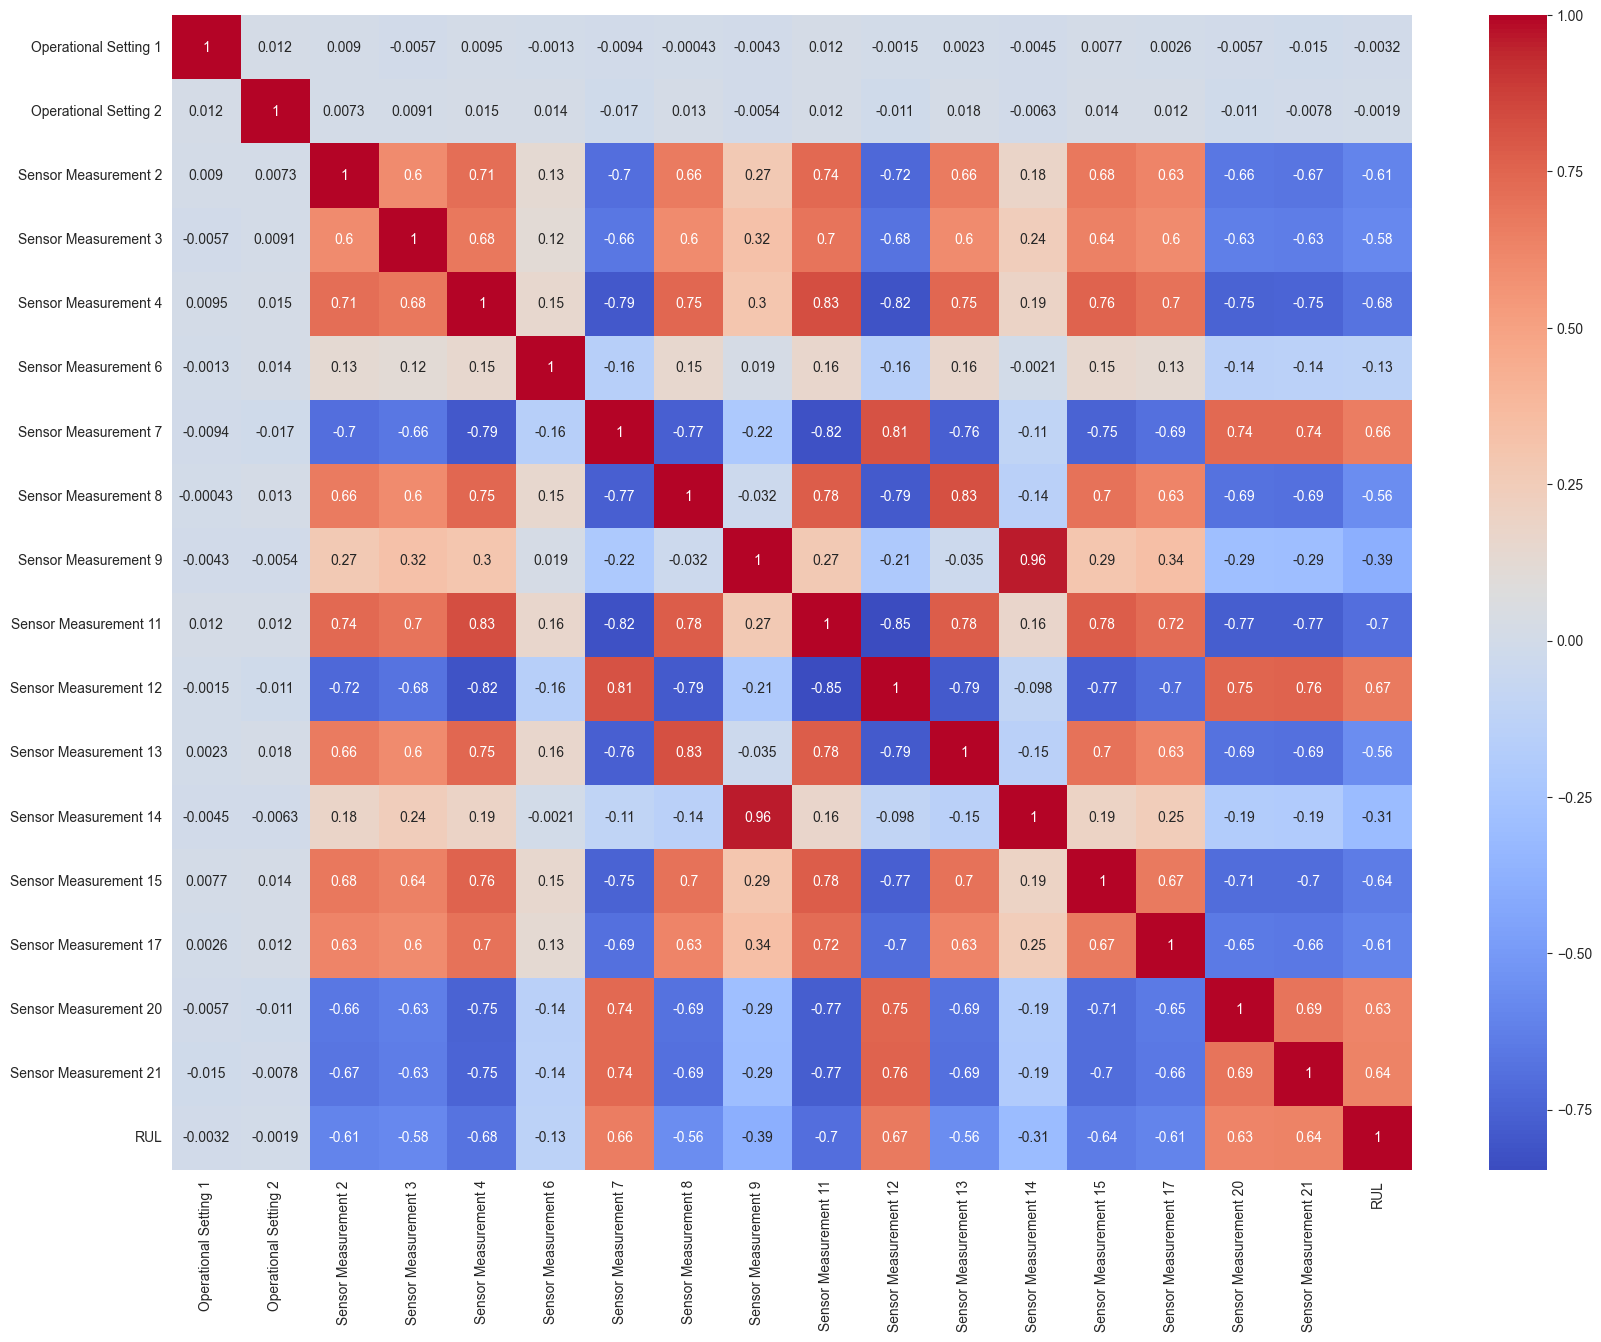

In [297]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [298]:
# Only getting the high correlated columns with the RUL column

# Get the name of the last column (the label column)
label_col = train_data.columns[-1]  # The name of the last column
high_corr_columns = []
for i in train_data.columns[:-1]:  # Iterate over all columns except the last one
    corr_value = train_data[i].corr(train_data[label_col])  # Compute correlation with the label column
    if corr_value > 0.5 or corr_value < -0.5:
        high_corr_columns.append(i)
        
high_corr_columns

['Sensor Measurement 2',
 'Sensor Measurement 3',
 'Sensor Measurement 4',
 'Sensor Measurement 7',
 'Sensor Measurement 8',
 'Sensor Measurement 11',
 'Sensor Measurement 12',
 'Sensor Measurement 13',
 'Sensor Measurement 15',
 'Sensor Measurement 17',
 'Sensor Measurement 20',
 'Sensor Measurement 21']

In [299]:
# Defining a copy of the train data to include only the highly correlated columns.

train_data_copy = train_data.loc[:,high_corr_columns]
train_data_copy['RUL'] = train_data['RUL']
train_data_copy

,Sensor Measurement 2,Sensor Measurement 3,Sensor Measurement 4,Sensor Measurement 7,Sensor Measurement 8,Sensor Measurement 11,Sensor Measurement 12,Sensor Measurement 13,Sensor Measurement 15,Sensor Measurement 17,Sensor Measurement 20,Sensor Measurement 21,RUL
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [300]:
# Defining X and y to train the model 

X = train_data_copy.iloc[:,:-1]
y = train_data_copy.iloc[:,-1]

In [302]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X,y)

RandomForestRegressor()

In [303]:
# Group by 'Unit Number' and get the row with the maximum 'Cycle' for each group
test_data_copy = test_data.loc[test_data.groupby('Unit Number')['Cycle'].idxmax()]

test_data_copy = test_data_copy.drop(columns=[col for col in test_data_copy.columns if col not in high_corr_columns])


In [306]:
# Making predictions for the test data

y_pred = random_forest_regressor.predict(test_data_copy)

In [314]:
# Getting validation data

y_true = pd.read_csv('RUL_FD001.txt', sep=' ', header=None)

In [315]:
y_true.drop([1], axis=1, inplace=True)

In [316]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_true, y_pred)

34.23216353080827

<Axes: >

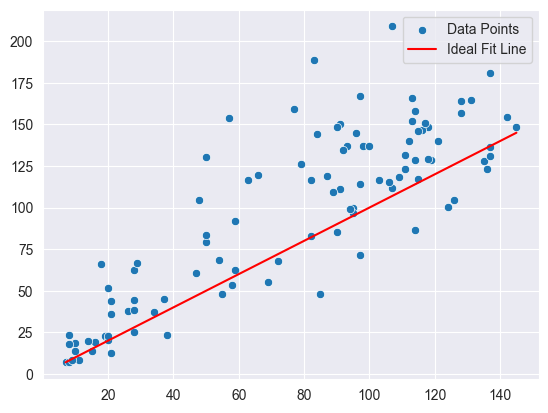

In [327]:
# Scatter plot for y_true and y_pred values

y_true_flatten = y_true.squeeze()

# Create the scatter plot for y_true and y_pred
sns.scatterplot(x=y_true, y=y_pred, label='Data Points')

# Draw a line representing y_true vs y_pred
sns.lineplot(x=y_true, y=y_true, color='red', label='Ideal Fit Line')